In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # to load in images
%matplotlib inline

In [66]:
ae = tf.keras.models.load_model('./best_7-24.h5')

In [67]:
encoder = tf.keras.models.Model(inputs=ae.input, outputs=ae.get_layer(name='latent').output)

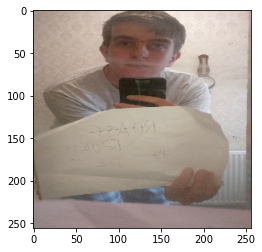

In [68]:
img = cv2.resize(cv2.imread('./faces/4rbve6.png'), (256,256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [69]:
def encode_vals(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return encoder.predict(img)[0]

def autoencoder_predict(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return ae.predict(img)[0]

In [70]:
encode_vals(img)

array([0.5914178 , 0.02542889, 0.4331635 , ..., 0.41179514, 0.48768345,
       0.22913224], dtype=float32)

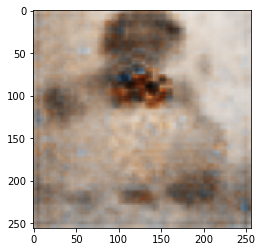

In [71]:
plt.imshow(autoencoder_predict(img))